In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading the data

In [ ]:
#Reshaping the data using melt
airquality = pd.read_csv('airquality.csv')

airquality['Date'] = airquality['Month'].astype(str) + '-' + airquality['Day'].astype(str)
airquality.set_index('Date', inplace=True)
# Print the head of airquality
airquality.head()


In [ ]:
df = pd.read_csv("Spotify_Youtube_Sample.csv")
df.head()

# Scatter Plot

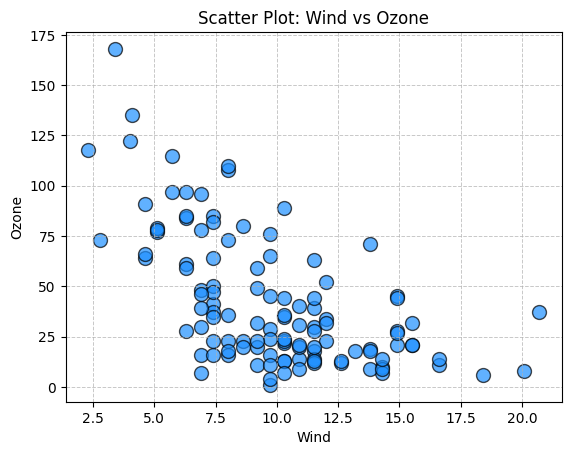

In [46]:
plt.scatter(airquality.Wind, airquality.Ozone, color='dodgerblue', edgecolor='black', s=100, alpha=0.7)
plt.title("Scatter Plot: Wind vs Ozone")
plt.xlabel("Wind")
plt.ylabel("Ozone")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

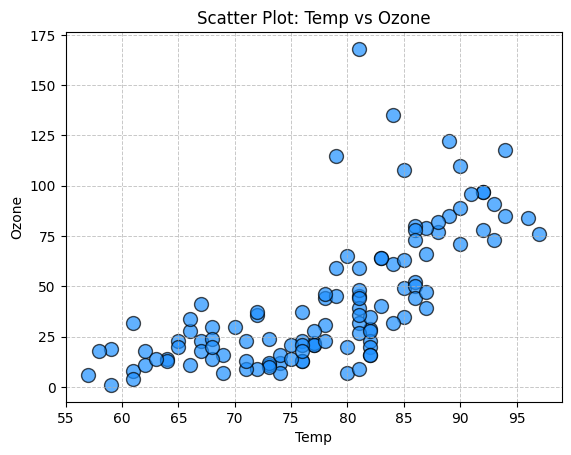

In [47]:
plt.scatter(airquality.Temp, airquality.Ozone, color='dodgerblue', edgecolor='black', s=100, alpha=0.7)
plt.title("Scatter Plot: Temp vs Ozone")
plt.xlabel("Temp")
plt.ylabel("Ozone")
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

# Grouped Bar Chart

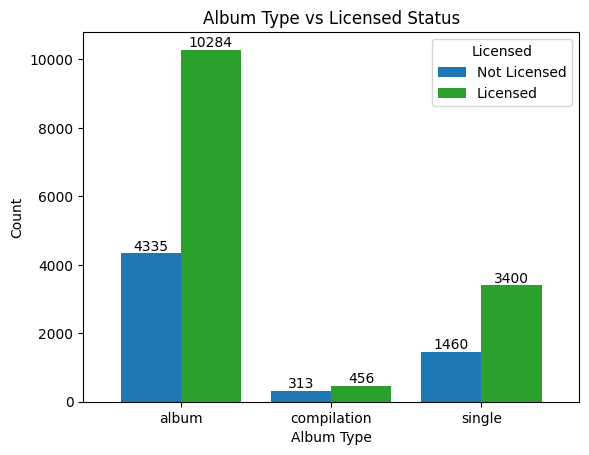

In [56]:
import matplotlib.pyplot as plt

# Count occurrences and unstack the data for easier plotting
counts = pd.crosstab(df['Album_type'], df['Licensed'])
colors = ['#1f77b4', '#2ca02c'] 
# Plotting
ax = counts.plot(kind='bar', color=colors, width=0.8)
plt.title('Album Type vs Licensed Status')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Licensed', labels=['Not Licensed', 'Licensed'])

# Adding values on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


# Stacked Bar Chart

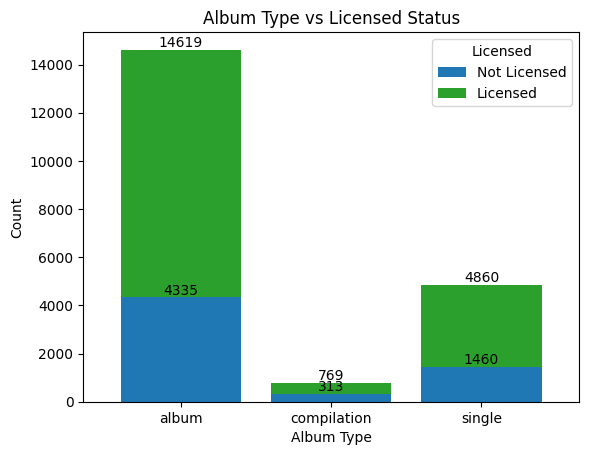

In [57]:
ax = counts.plot(kind='bar', stacked=True, color=colors, width=0.8)

# Customize the chart
plt.title('Album Type vs Licensed Status')
plt.xlabel('Album Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Licensed', labels=['Not Licensed', 'Licensed'])

# Adding values on top of the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

# Box Plot

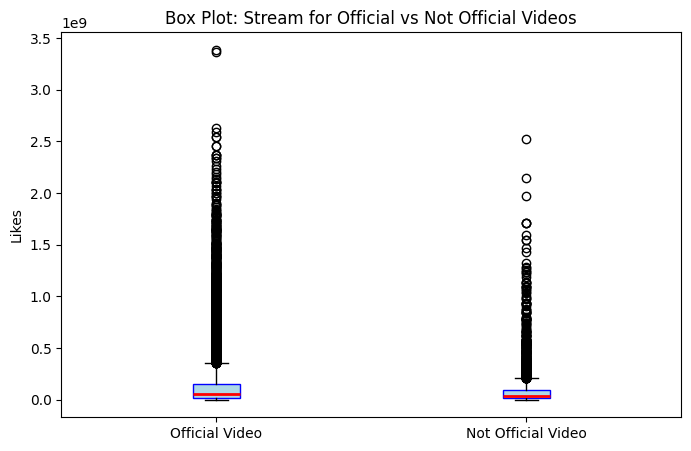

In [50]:
# Separate data based on 'official_video' values (True and False)
official_video_true = df[df['official_video'] == True]['Stream']
official_video_false = df[df['official_video'] == False]['Stream']

# Combine into a list for boxplot
data = [official_video_true.dropna(), official_video_false.dropna()]  # Handle NaNs

# Create the box plot
plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=['Official Video', 'Not Official Video'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))

# Add labels and title
plt.title('Box Plot: Stream for Official vs Not Official Videos')
plt.ylabel('Likes')

# Show the plot
plt.show()

# 3D Scatter Plot

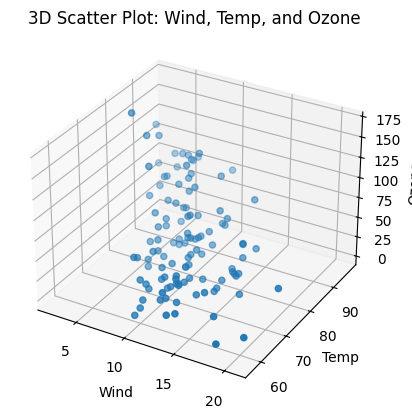

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(airquality.Wind, airquality.Temp, airquality.Ozone)
ax.set_xlabel('Wind')
ax.set_ylabel('Temp')
ax.set_zlabel('Ozone')

plt.title('3D Scatter Plot: Wind, Temp, and Ozone')

# Show the plot
plt.show()


# Bubble Chart

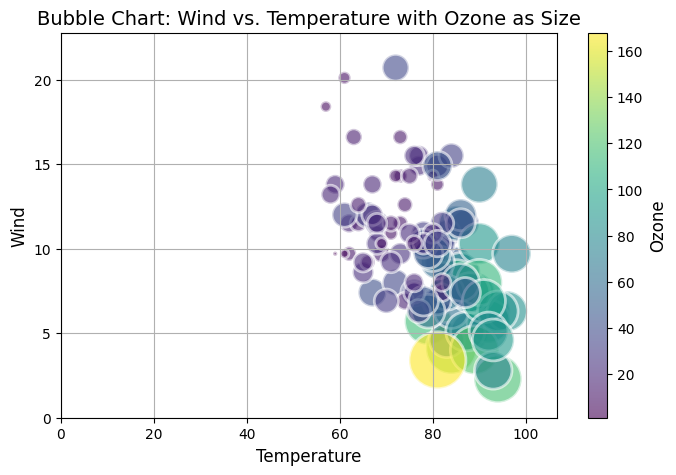

In [52]:
airquality_cleaned = airquality.dropna()

# Extract data for the bubble chart
x = airquality_cleaned['Temp']
y = airquality_cleaned['Wind']
sizes = airquality_cleaned['Ozone'] * 10  # Adjust sizes for better visibility
colors = airquality_cleaned['Ozone']  # Color based on Ozone levels

# Create the bubble chart
plt.figure(figsize=(8, 5))
scatter = plt.scatter(x, y, s=sizes, c=colors, alpha=0.6, edgecolors="w", linewidth=2, cmap='viridis')

# Add labels and title
plt.title('Bubble Chart: Wind vs. Temperature with Ozone as Size', fontsize=14)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Wind', fontsize=12)

# Customize the x and y axis limits
plt.xlim(0, max(x) * 1.1)
plt.ylim(0, max(y) * 1.1)

# Show the grid
plt.grid(True)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Ozone', fontsize=12)

# Show the plot
plt.show()

# HeatMap

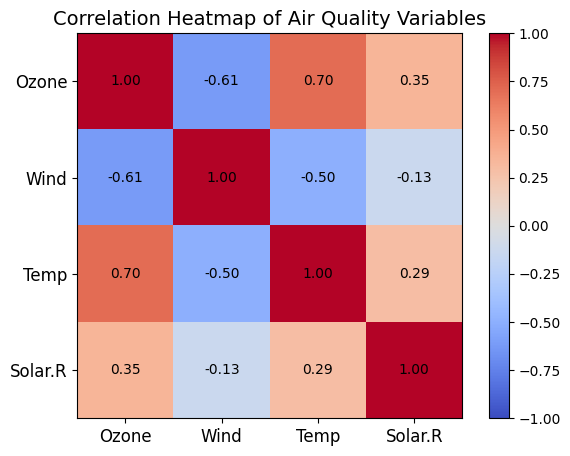

In [58]:

# Calculate the correlation matrix
corr = airquality_cleaned[['Ozone', 'Wind', 'Temp', 'Solar.R']].corr()

# Create the heatmap
plt.figure(figsize=(7, 5))
cax = plt.imshow(corr, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)

# Add color bar
plt.colorbar(cax)

# Set ticks and labels
plt.xticks(np.arange(len(corr.columns)), corr.columns, fontsize=12)
plt.yticks(np.arange(len(corr.columns)), corr.columns, fontsize=12)

# Add title and annotations
plt.title('Correlation Heatmap of Air Quality Variables', fontsize=14)
for (i, j), val in np.ndenumerate(corr.values):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

# Show the plot
plt.show()

# Pair Plot

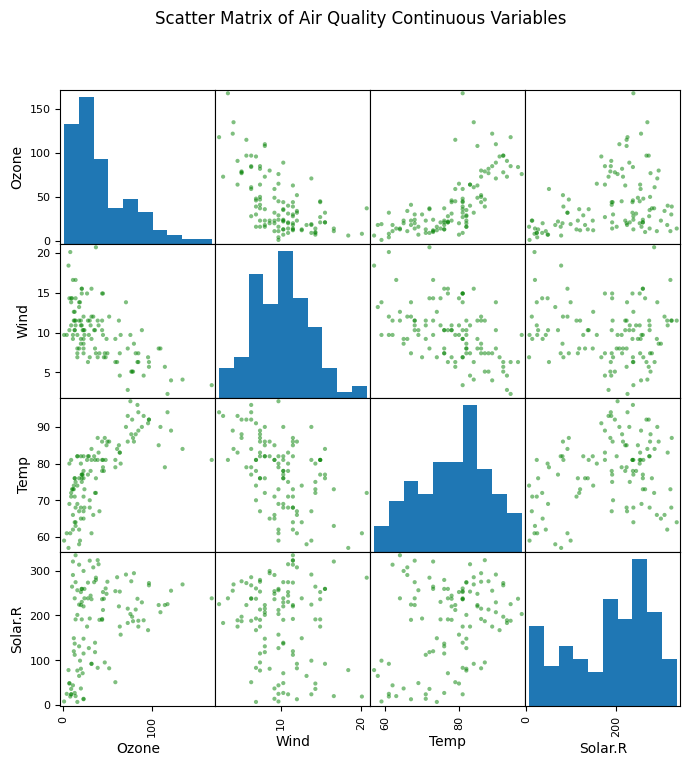

In [59]:
# Select continuous variables
variables = ['Ozone', 'Wind', 'Temp', 'Solar.R']

# Create scatter matrix
pd.plotting.scatter_matrix(airquality_cleaned[variables],  figsize=(8, 8), color='green')

# Add title
plt.suptitle('Scatter Matrix of Air Quality Continuous Variables')

# Show the plot
plt.show()

# Stacked Line Chart

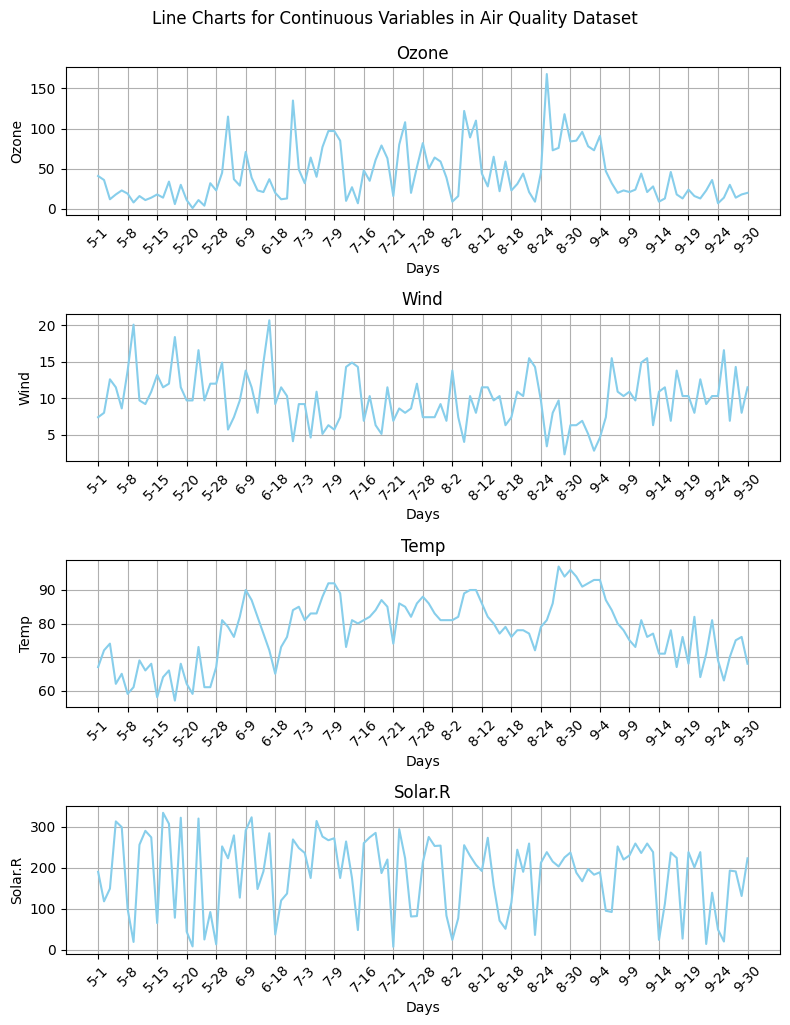

In [66]:
# Create a figure with subplots
plt.figure(figsize=(8, 10))

# Loop through the variables to create individual line plots
for i, var in enumerate(variables):
    plt.subplot(len(variables), 1, i + 1)  # Create a subplot for each variable
    plt.plot(airquality_cleaned.index, airquality_cleaned[var], label=var, color='skyblue')
    plt.title(var)
    plt.xlabel('Days')
    plt.xticks(ticks=airquality_cleaned.index[::5], rotation=45)
    plt.ylabel(var)
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.suptitle('Line Charts for Continuous Variables in Air Quality Dataset', y=1.02)
plt.show()

# Multiline Chart

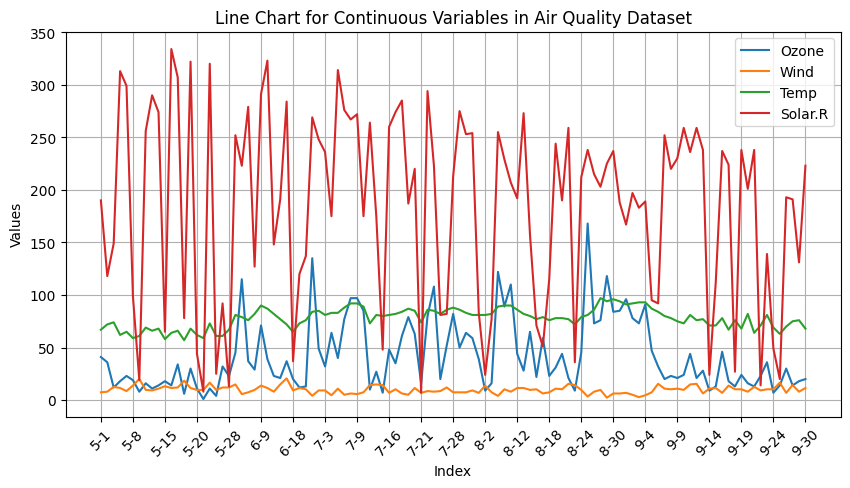

In [61]:
# Create a single line chart
plt.figure(figsize=(10, 5))

# Loop through the variables to plot them
for var in variables:
    plt.plot(airquality_cleaned.index, airquality_cleaned[var], label=var)

# Add title and labels
plt.title('Line Chart for Continuous Variables in Air Quality Dataset')
plt.xlabel('Index')
plt.xticks(ticks=airquality_cleaned.index[::5], rotation=45)
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Multi Box Plot

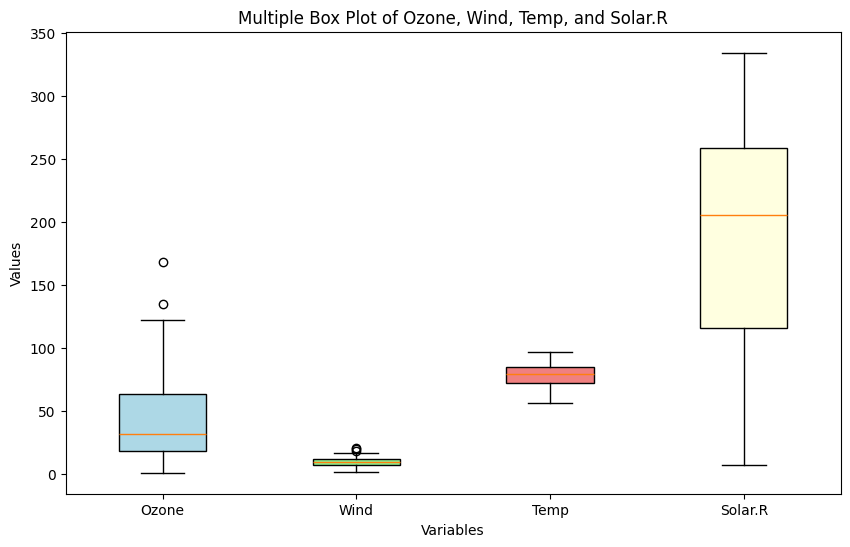

In [63]:
import matplotlib.pyplot as plt

# Select the relevant columns from the DataFrame
data = [airquality['Ozone'].dropna(), airquality['Wind'].dropna(), 
        airquality['Temp'].dropna(), airquality['Solar.R'].dropna()]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, patch_artist=True, tick_labels=['Ozone', 'Wind', 'Temp', 'Solar.R'])

# Set colors for each box
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)

# Add title and labels
plt.title('Multiple Box Plot of Ozone, Wind, Temp, and Solar.R')
plt.ylabel('Values')
plt.xlabel('Variables')

# Show the plot
plt.show()


In [91]:
import pandas as pd
import numpy as np

# Create the data
data = {
    "Age": [32, 45, 20, 36, 52, 41],
    "Years of Experience": [8, 15, 4, 10, 20, 12]
}

df = pd.DataFrame(data)

In [92]:
df

,Age,Years of Experience
0,32,8
1,45,15
2,20,4
3,36,10
4,52,20
5,41,12


In [98]:
df.cov()

,Age,Years of Experience
Age,123.466667,60.8
Years of Experience,60.800000,31.1


<Axes: xlabel='Age', ylabel='Years of Experience'>

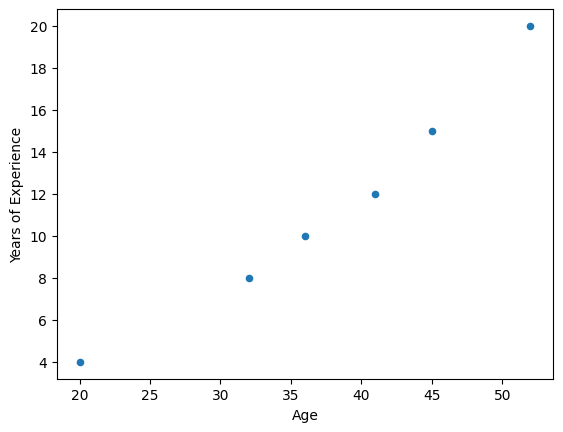

In [97]:
df.plot.scatter('Age','Years of Experience' )

In [107]:
x = [2,5,7,9,11]
y =[8,1,2,1,-5,]
d = pd.DataFrame({'x':x, 'y':y})

In [100]:
d

,x,y
0,2,1
1,5,1
2,7,1
3,9,1
4,11,1


In [108]:
d.cov()

,x,y
x,12.20,-14.65
y,-14.65,21.30


In [109]:
d.corr()

,x,y
x,1.000000,-0.908799
y,-0.908799,1.000000
